# User input

In [1]:
start_year = 1950
stop_year = 2100

start_year_past = 1950
stop_year_past = 2014

start_year_future = 2015
stop_year_future = 2100

tuple_error_bar = ('pi',80)
name_project = 'WTP_Mutua_EIB'
name_city = 'Mutua'

# Import package

In [2]:
from scipy import stats
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy.stats import gumbel_r
from scipy.stats import gumbel_l
import os
import os.path
import math
import seaborn as sns

from Functions_Indicators import add_year_month_season
from Functions_Indicators import filter_dataframe
#from Functions_Indicators_precipitation import changes_in_indicators

# Import data

In [3]:
out_path = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz'
csv_path = os.path.join(out_path,'csv_file','pr','pr_mm_per_day_day_1950-2100','pr_1950-2100_projectsMoz.csv')
precipitation = pd.read_csv(csv_path,header=[0],index_col=[0,1,2,3,4])
#list_time_2021_2060=pd.date_range('01-01-2021','31-12-2060', freq='D').strftime('%d-%m-%Y').values.tolist()

In [4]:
precipitation_filtered = filter_dataframe(precipitation,name_project,['NESM3']) # kill NESM3 because no value for it

In [109]:
precipitation.index.levels[0]

Index(['Chimoio_WTP_EIB', 'Gorongosa_EIB', 'Pemba_EIB', 'WTP_Mutua_EIB'], dtype='object', name='Name project')

## Average yearly precipitation

In [9]:
from Functions_Indicators import temporal_avg
from Functions_Indicators import yearly_avg_distr

In [10]:
df_yearly_avg=precipitation_filtered.copy(deep=True)

In [11]:
df_yearly_avg=temporal_avg(df_yearly_avg,'precipitation','Average yearly precipitation mm/year', 'year')

TypeError: temporal_avg() takes 3 positional arguments but 4 were given

In [ ]:
fig,ax=plt.subplots()
sns.lineplot(df_yearly_avg,x='Year',y=df_yearly_avg.columns[0],hue='Experiment',errorbar=('pi',80))
handles, labels=ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', ncol=1, bbox_to_anchor=(1.1, 0.6),title='Legend')
ax.get_legend().remove() # this line permits to have a common legend for the boxplots and the line
plt.ylabel('Mean precipitation mm per year')
plt.title('Mean precipitation mm per year, depending on scenario and\naccross models, between 1950 to 2100 at Gorongosa, MZ\ndata modeled with NEX-GDDP-CMIP6')

In [ ]:
df_yearly_avg=yearly_avg(df_yearly_avg,'Average yearly precipitation mm/year', 'month')

In [ ]:
month_order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
data_boxplot=df_yearly_avg.reset_index().set_index('Month').loc[month_order].reset_index()
#data_line=data_line.reset_index().set_index(temporal_resolution).loc[month_order].reset_index()   

In [ ]:
sns.boxplot(data=data_boxplot,x='Month',y='Mean of the daily precipitation rate mm_per_month',hue='Experiment')

In [ ]:
# For future period
title_column = 'Yearly average precipitation mm/year period '+str(start_year_future)+'-'+str(stop_year_future)

df_years_avg_future_distribution= yearly_avg_pr(df_future,title_column)

In [ ]:
sns.lineplot(tas_yearly_avg,x='Year',y='Yearly average temperature',hue='Experiment',errorbar=tuple_error_bar)

In [ ]:
# Comparaison between past and future period

In [ ]:
changes_past_future_indicator = pd.DataFrame()
changes_past_future_indicator1 = changes_in_indicators(df_years_avg_past_distribution,df_years_avg_future_distribution,'Average yearly precipitation','mm/year','Incremental rainfall change')
changes_past_future_indicator=pd.concat([changes_past_future_indicator,changes_past_future_indicator1])
changes_past_future_indicator

In [ ]:
df_past

In [ ]:
# boxplot

df_yearly_avg = df_past.copy(deep =True)
df_yearly_avg=df_yearly_avg.drop(labels='Date',axis=1)
df_yearly_avg=df_yearly_avg.rename(columns={df_yearly_avg.columns[3]:'Yearly precipitation mm/year'})
df_yearly_avg = df_yearly_avg.groupby(['Name project','Experiment','Model','Year']).sum() # sum per year
#df_yearly_avg = df_yearly_avg.groupby(['Name project','Experiment','Model']).mean()

dict_boxplot = plt.boxplot([df_yearly_avg.loc[('PT_Revubue_2_Rev_2_01','ssp126'),'Yearly precipitation mm/year'].values.reshape(len(df_yearly_avg.loc[('PT_Revubue_2_Rev_2_01','ssp126'),'Yearly precipitation mm/year']),),df_yearly_avg.loc[('PT_Revubue_2_Rev_2_01','ssp245'),'Yearly precipitation mm/year'].values.reshape(len(df_yearly_avg.loc[('PT_Revubue_2_Rev_2_01','ssp245'),'Yearly precipitation mm/year']),),df_yearly_avg.loc[('PT_Revubue_2_Rev_2_01','ssp370'),'Yearly precipitation mm/year'].values.reshape(len(df_yearly_avg.loc[('PT_Revubue_2_Rev_2_01','ssp370'),'Yearly precipitation mm/year']),),df_yearly_avg.loc[('PT_Revubue_2_Rev_2_01','ssp585'),'Yearly precipitation mm/year'].values.reshape(len(df_yearly_avg.loc[('PT_Revubue_2_Rev_2_01','ssp126'),'Yearly precipitation mm/year']),)],notch=True, whis =(10,90),widths = 0.15, patch_artist=True,labels=df_yearly_avg.index.levels[1].tolist())
# ... present boxplot over the period for each models
# this functions returns varius parameters of the boxplot in the dict_boxplot. This funcitons also returns an image of it
# here, numpy_array is a vector. But can also include array with several columns. Each columns will have a boxplot
# 'notch' is true to enhance part where the median is
# 'whis' is the percentile value for the whiskers, every data out of the range indicted by those 2 floats are represented as points
# 'widths' determine width of the boxes
# 'patch_artist' colors the boxplots
# 'labels' gives a name to every column included in the data part

#str = 'Annual maximum precipitation mm/day\naccross different scenarios between 2030 and 2060'
#title_png = 'Annual maximum precipitation mm.day accross different scenarios between 2030 and 2060.png'
#plt.title(str)
plt.xlabel('Scenarios')
plt.ylabel('Yearly precipitation mm/year for project PT_Revubue_2_Rev_2_01')
#path_boxplot = os.path.join(path_figure,'Boxplots')
#if not os.path.isdir(path_boxplot):
#    os.makedirs(path_boxplot)
#plt.savefig(os.path.join(path_boxplot,title_png),format ='png') # savefig or save text must be before plt.show. for savefig, format should be explicity written
plt.show()

In [ ]:
df_yearly_avg = df_yearly_avg.groupby(['Name project','Experiment','Model']).mean()
title_column = 'Yearly average precipitation mm/year'
df_yearly_avg=df_yearly_avg.rename(columns={df_yearly_avg.columns[0]:title_column})
df_yearly_avg

In [ ]:
dict_boxplot = plt.boxplot([df_yearly_avg.loc[(df_yearly_avg.index.levels[0][0]),title_column].values.reshape(len(df_yearly_avg.loc[(df_yearly_avg.index.levels[0][0]),title_column]),),df_yearly_avg.loc[(df_yearly_avg.index.levels[0][1]),title_column].values.reshape(len(df_yearly_avg.loc[(df_yearly_avg.index.levels[0][1]),title_column]),),df_yearly_avg.loc[(df_yearly_avg.index.levels[0][2]),title_column].values.reshape(len(df_yearly_avg.loc[(df_yearly_avg.index.levels[0][2]),title_column]),),df_yearly_avg.loc[(df_yearly_avg.index.levels[0][3]),title_column].values.reshape(len(df_yearly_avg.loc[(df_yearly_avg.index.levels[0][3]),title_column]),),df_yearly_avg.loc[(df_yearly_avg.index.levels[0][4]),title_column].values.reshape(len(df_yearly_avg.loc[(df_yearly_avg.index.levels[0][4]),title_column]),),df_yearly_avg.loc[(df_yearly_avg.index.levels[0][5]),title_column].values.reshape(len(df_yearly_avg.loc[(df_yearly_avg.index.levels[0][5]),title_column]),),df_yearly_avg.loc[(df_yearly_avg.index.levels[0][6]),title_column].values.reshape(len(df_yearly_avg.loc[(df_yearly_avg.index.levels[0][6]),title_column]),)],notch=True, whis =(10,90),widths = 0.15, patch_artist=True,labels=df_yearly_avg.index.levels[0].tolist())
# ... present boxplot over the period for each models
# this functions returns varius parameters of the boxplot in the dict_boxplot. This funcitons also returns an image of it
# here, numpy_array is a vector. But can also include array with several columns. Each columns will have a boxplot
# 'notch' is true to enhance part where the median is
# 'whis' is the percentile value for the whiskers, every data out of the range indicted by those 2 floats are represented as points
# 'widths' determine width of the boxes
# 'patch_artist' colors the boxplots
# 'labels' gives a name to every column included in the data part

#str = 'Annual maximum precipitation mm/day\naccross different scenarios between 2030 and 2060'
#title_png = 'Annual maximum precipitation mm.day accross different scenarios between 2030 and 2060.png'
#plt.title(str)
plt.xlabel('Projects')
plt.ylabel('Average yearly precipitation mm/year for project PT_Revubue_2_Rev_2_01')
#path_boxplot = os.path.join(path_figure,'Boxplots')
#if not os.path.isdir(path_boxplot):
#    os.makedirs(path_boxplot)
#plt.savefig(os.path.join(path_boxplot,title_png),format ='png') # savefig or save text must be before plt.show. for savefig, format should be explicity written
plt.show()

## Seasonal average precipitation

In [ ]:
from Functions_Indicators_precipitation import avg_dry_season_precipitation

In mozambique, dry season from April to september. Humid season from October to March

In [ ]:
# historic

In [ ]:
title_column1 = 'Yearly average precipitation mm/season per year for the period '+str(start_year_past)+'-'+str(stop_year_past)
pr_past_dry_season_mean_distribution = avg_dry_season_precipitation(df_past,title_column1)

In [ ]:
# future

In [ ]:
title_column1 = 'Yearly average precipitation mm/dry season for the period '+str(start_year_future)+'-'+str(stop_year_future)
pr_future_dry_season_mean_distribution = avg_dry_season_precipitation(df_future,title_column1)

In [ ]:
pr_future_dry_season_mean_distribution

In [ ]:
# Comparaison between past and future period

In [ ]:
changes_past_future_indicator1 = changes_in_indicators(pr_past_dry_season_mean_distribution,pr_future_dry_season_mean_distribution,'Average dry season precipitation','mm/(months of dry season)','Incremental rainfall change')
changes_past_future_indicator=pd.merge(changes_past_future_indicator, changes_past_future_indicator1, left_index=True, right_index=True, how='outer')

In [ ]:
changes_past_future_indicator

## Return period

In [13]:
 #INDICATOR NOT FINISHED
#from Functions_Indicators_precipitation import threshold_coresponding_to_return_period
from Functions_Indicators import dataframe_threshold_coresponding_to_return_period
#from Functions_Indicators_precipitation import dataframe_future_return_period_of_1_day_event

In [23]:
precipitation_filtered_copy = precipitation_filtered.copy(deep=True)

In [26]:
precipitation_filtered_copy=precipitation_filtered_copy[precipitation_filtered_copy['Model']!='IITM-ESM']
precipitation_filtered_copy=precipitation_filtered_copy[precipitation_filtered_copy['Model']!='MRI-ESM2-0']
precipitation_filtered_copy=precipitation_filtered_copy[precipitation_filtered_copy['Model']!='ACCESS-CM2'] 
precipitation_filtered_copy=precipitation_filtered_copy[precipitation_filtered_copy['Model']!='MPI-ESM1-2-HR']

In [29]:
return_period_past=dataframe_threshold_coresponding_to_return_period(precipitation_filtered_copy[precipitation_filtered_copy['Experiment']=='historical'])

Name project WTP_Mutua_EIB ssp historical model ACCESS-ESM1-5
Name project WTP_Mutua_EIB ssp historical model BCC-CSM2-MR
Name project WTP_Mutua_EIB ssp historical model CMCC-CM2-SR5
Name project WTP_Mutua_EIB ssp historical model CMCC-ESM2
Name project WTP_Mutua_EIB ssp historical model CanESM5
Name project WTP_Mutua_EIB ssp historical model MIROC6
Name project WTP_Mutua_EIB ssp historical model MPI-ESM1-2-LR
Name project WTP_Mutua_EIB ssp historical model NorESM2-LM
Name project WTP_Mutua_EIB ssp historical model NorESM2-MM
Name project WTP_Mutua_EIB ssp historical model TaiESM1


In [32]:
precipitation_filtered_copy_future=precipitation_filtered_copy[precipitation_filtered_copy['Experiment']!='historical']

In [38]:
return_period_future_2020_2060=dataframe_threshold_coresponding_to_return_period(precipitation_filtered_copy_future[precipitation_filtered_copy_future['Year'].between(2020,2060)])

Name project WTP_Mutua_EIB ssp ssp126 model ACCESS-ESM1-5
Name project WTP_Mutua_EIB ssp ssp126 model BCC-CSM2-MR
Name project WTP_Mutua_EIB ssp ssp126 model CMCC-CM2-SR5
Name project WTP_Mutua_EIB ssp ssp126 model CMCC-ESM2
Name project WTP_Mutua_EIB ssp ssp126 model CanESM5
Name project WTP_Mutua_EIB ssp ssp126 model MIROC6
Name project WTP_Mutua_EIB ssp ssp126 model MPI-ESM1-2-LR
Name project WTP_Mutua_EIB ssp ssp126 model NorESM2-LM
Name project WTP_Mutua_EIB ssp ssp126 model NorESM2-MM
Name project WTP_Mutua_EIB ssp ssp126 model TaiESM1
Name project WTP_Mutua_EIB ssp ssp245 model ACCESS-ESM1-5
Name project WTP_Mutua_EIB ssp ssp245 model BCC-CSM2-MR
Name project WTP_Mutua_EIB ssp ssp245 model CMCC-CM2-SR5
Name project WTP_Mutua_EIB ssp ssp245 model CMCC-ESM2
Name project WTP_Mutua_EIB ssp ssp245 model CanESM5
Name project WTP_Mutua_EIB ssp ssp245 model MIROC6
Name project WTP_Mutua_EIB ssp ssp245 model MPI-ESM1-2-LR
Name project WTP_Mutua_EIB ssp ssp245 model NorESM2-LM
Name projec

In [39]:
return_period_future_2060_2100=dataframe_threshold_coresponding_to_return_period(precipitation_filtered_copy_future[precipitation_filtered_copy_future['Year'].between(2060,2100)])

Name project WTP_Mutua_EIB ssp ssp126 model ACCESS-ESM1-5
Name project WTP_Mutua_EIB ssp ssp126 model BCC-CSM2-MR
Name project WTP_Mutua_EIB ssp ssp126 model CMCC-CM2-SR5
Name project WTP_Mutua_EIB ssp ssp126 model CMCC-ESM2
Name project WTP_Mutua_EIB ssp ssp126 model CanESM5
Name project WTP_Mutua_EIB ssp ssp126 model MIROC6
Name project WTP_Mutua_EIB ssp ssp126 model MPI-ESM1-2-LR
Name project WTP_Mutua_EIB ssp ssp126 model NorESM2-LM
Name project WTP_Mutua_EIB ssp ssp126 model NorESM2-MM
Name project WTP_Mutua_EIB ssp ssp126 model TaiESM1
Name project WTP_Mutua_EIB ssp ssp245 model ACCESS-ESM1-5
Name project WTP_Mutua_EIB ssp ssp245 model BCC-CSM2-MR
Name project WTP_Mutua_EIB ssp ssp245 model CMCC-CM2-SR5
Name project WTP_Mutua_EIB ssp ssp245 model CMCC-ESM2
Name project WTP_Mutua_EIB ssp ssp245 model CanESM5
Name project WTP_Mutua_EIB ssp ssp245 model MIROC6
Name project WTP_Mutua_EIB ssp ssp245 model MPI-ESM1-2-LR
Name project WTP_Mutua_EIB ssp ssp245 model NorESM2-LM
Name projec

In [44]:
return_period_future_2020_2060['Period'] ='2020-2060'

In [45]:
return_period_future_2060_2100['Period'] ='2060-2100'

In [46]:
return_period_past['Period']='historic'

In [58]:
return_period_past[['Value for return period 100 years mm/day']].loc['WTP_Mutua_EIB','historical','NorESM2-MM'].values

array([86], dtype=object)

In [47]:
return_period_future_2020_2060

Value for return period 50 years mm/day  \
Name project  Experiment Model                                                   
WTP_Mutua_EIB ssp585     NorESM2-MM                                         83   
                         MIROC6                                             80   
                         CanESM5                                            67   
                         TaiESM1                                            86   
                         NorESM2-LM                                         76   
                         BCC-CSM2-MR                                        77   
                         ACCESS-ESM1-5                                      81   
                         CMCC-CM2-SR5                                       93   
                         MPI-ESM1-2-LR                                      80   
                         CMCC-ESM2                                          85   
              ssp126     NorESM2-MM                                         86   
                         MIROC6                                             78   
                         CanESM5                                            66   
                         TaiESM1                                            80   
                         NorESM2-LM                                         77   
                         BCC-CSM2-MR                                        78   
                         ACCESS-ESM1-5                                      67   
                         CMCC-CM2-SR5                                       89   
                         MPI-ESM1-2-LR                                      74   
                         CMCC-ESM2                                          74   
              ssp370     NorESM2-MM                                         89   
                         MIROC6                                             85   
                         CanESM5                                            69   
                         TaiESM1                                            97   
                         NorESM2-LM                                         70   
                         BCC-CSM2-MR                                        84   
                         ACCESS-ESM1-5                                      69   
                         CMCC-CM2-SR5                                       91   
                         MPI-ESM1-2-LR                                      73   
                         CMCC-ESM2                                          77   
              ssp245     NorESM2-MM                                         87   
                         MIROC6                                             69   
                         CanESM5                                            71   
                         TaiESM1                                            92   
                         NorESM2-LM                                         78   
                         BCC-CSM2-MR                                        79   
                         ACCESS-ESM1-5                                      84   
                         CMCC-CM2-SR5                                       94   
                         MPI-ESM1-2-LR                                      79   
                         CMCC-ESM2                                          85   

                                       Value for return period 100 years mm/day  \
Name project  Experiment Model                                                    
WTP_Mutua_EIB ssp585     NorESM2-MM                                          90   
                         MIROC6                                              87   
                         CanESM5                                             73   
                         TaiESM1                                             93   
                         NorESM2-LM                                          82   
             

In [63]:
return_period_future_2020_2060[['Relative change for 100 year event between past and period 2020-2060 %']]=return_period_future_2020_2060[['Value for return period 100 years mm/day']]

In [69]:
for ssp in list(return_period_future_2020_2060.index.levels[1]):
    for model in list(return_period_future_2020_2060.index.levels[2]):
        past_value=return_period_past[['Value for return period 100 years mm/day']].loc['WTP_Mutua_EIB','historical',model].values
        print('past_value '+str(past_value))
        future_value=return_period_future_2020_2060[['Value for return period 100 years mm/day']].loc['WTP_Mutua_EIB',ssp,model]
        print('future_value '+str(future_value))
        return_period_future_2020_2060['Relative change for 100 year event between past and period 2020-2060 %'].loc['WTP_Mutua_EIB',ssp,model]=(future_value-past_value)/past_value*100

past_value [68]
future_value Value for return period 100 years mm/day    72
Name: (WTP_Mutua_EIB, ssp126, ACCESS-ESM1-5), dtype: object
past_value [84]
future_value Value for return period 100 years mm/day    84
Name: (WTP_Mutua_EIB, ssp126, BCC-CSM2-MR), dtype: object
past_value [84]
future_value Value for return period 100 years mm/day    97
Name: (WTP_Mutua_EIB, ssp126, CMCC-CM2-SR5), dtype: object
past_value [90]
future_value Value for return period 100 years mm/day    80
Name: (WTP_Mutua_EIB, ssp126, CMCC-ESM2), dtype: object
past_value [69]
future_value Value for return period 100 years mm/day    71
Name: (WTP_Mutua_EIB, ssp126, CanESM5), dtype: object
past_value [73]
future_value Value for return period 100 years mm/day    85
Name: (WTP_Mutua_EIB, ssp126, MIROC6), dtype: object
past_value [69]
future_value Value for return period 100 years mm/day    80
Name: (WTP_Mutua_EIB, ssp126, MPI-ESM1-2-LR), dtype: object
past_value [71]
future_value Value for return period 100 years mm/da

In [71]:
return_period_future_2020_2060.drop('Relative change for 100 year event between past and period 2020-2060',axis=1)

Value for return period 50 years mm/day  \
Name project  Experiment Model                                                   
WTP_Mutua_EIB ssp585     NorESM2-MM                                         83   
                         MIROC6                                             80   
                         CanESM5                                            67   
                         TaiESM1                                            86   
                         NorESM2-LM                                         76   
                         BCC-CSM2-MR                                        77   
                         ACCESS-ESM1-5                                      81   
                         CMCC-CM2-SR5                                       93   
                         MPI-ESM1-2-LR                                      80   
                         CMCC-ESM2                                          85   
              ssp126     NorESM2-MM                                         86   
                         MIROC6                                             78   
                         CanESM5                                            66   
                         TaiESM1                                            80   
                         NorESM2-LM                                         77   
                         BCC-CSM2-MR                                        78   
                         ACCESS-ESM1-5                                      67   
                         CMCC-CM2-SR5                                       89   
                         MPI-ESM1-2-LR                                      74   
                         CMCC-ESM2                                          74   
              ssp370     NorESM2-MM                                         89   
                         MIROC6                                             85   
                         CanESM5                                            69   
                         TaiESM1                                            97   
                         NorESM2-LM                                         70   
                         BCC-CSM2-MR                                        84   
                         ACCESS-ESM1-5                                      69   
                         CMCC-CM2-SR5                                       91   
                         MPI-ESM1-2-LR                                      73   
                         CMCC-ESM2                                          77   
              ssp245     NorESM2-MM                                         87   
                         MIROC6                                             69   
                         CanESM5                                            71   
                         TaiESM1                                            92   
                         NorESM2-LM                                         78   
                         BCC-CSM2-MR                                        79   
                         ACCESS-ESM1-5                                      84   
                         CMCC-CM2-SR5                                       94   
                         MPI-ESM1-2-LR                                      79   
                         CMCC-ESM2                                          85   

                                       Value for return period 100 years mm/day  \
Name project  Experiment Model                                                    
WTP_Mutua_EIB ssp585     NorESM2-MM                                          90   
                         MIROC6                                              87   
                         CanESM5                                             73   
                         TaiESM1                                             93   
                         NorESM2-LM                                          82   
             

In [72]:
return_period_future_2060_2100[['Relative change for 100 year event between past and period 2060-2100 %']]=return_period_future_2060_2100[['Value for return period 100 years mm/day']]

In [74]:
for ssp in list(return_period_future_2060_2100.index.levels[1]):
    for model in list(return_period_future_2060_2100.index.levels[2]):
        past_value=return_period_past[['Value for return period 100 years mm/day']].loc['WTP_Mutua_EIB','historical',model].values
        print('past_value '+str(past_value))
        future_value=return_period_future_2060_2100[['Value for return period 100 years mm/day']].loc['WTP_Mutua_EIB',ssp,model]
        print('future_value '+str(future_value))
        return_period_future_2060_2100['Relative change for 100 year event between past and period 2060-2100 %'].loc['WTP_Mutua_EIB',ssp,model]=(future_value-past_value)/past_value*100

past_value [68]
future_value Value for return period 100 years mm/day    89
Name: (WTP_Mutua_EIB, ssp126, ACCESS-ESM1-5), dtype: object
past_value [84]
future_value Value for return period 100 years mm/day    86
Name: (WTP_Mutua_EIB, ssp126, BCC-CSM2-MR), dtype: object
past_value [84]
future_value Value for return period 100 years mm/day    106
Name: (WTP_Mutua_EIB, ssp126, CMCC-CM2-SR5), dtype: object
past_value [90]
future_value Value for return period 100 years mm/day    92
Name: (WTP_Mutua_EIB, ssp126, CMCC-ESM2), dtype: object
past_value [69]
future_value Value for return period 100 years mm/day    67
Name: (WTP_Mutua_EIB, ssp126, CanESM5), dtype: object
past_value [73]
future_value Value for return period 100 years mm/day    94
Name: (WTP_Mutua_EIB, ssp126, MIROC6), dtype: object
past_value [69]
future_value Value for return period 100 years mm/day    80
Name: (WTP_Mutua_EIB, ssp126, MPI-ESM1-2-LR), dtype: object
past_value [71]
future_value Value for return period 100 years mm/d

In [84]:
data_boxplot= pd.concat([return_period_future_2020_2060[['Relative change for 100 year event between past and period 2020-2060 %','Period']],return_period_future_2060_2100[['Relative change for 100 year event between past and period 2060-2100 %','Period']]])

In [94]:
data_boxplot = data_boxplot.fillna(0)

In [98]:
data_boxplot['Relative change between past and future period'] = data_boxplot['Relative change for 100 year event between past and period 2020-2060 %']+data_boxplot['Relative change for 100 year event between past and period 2060-2100 %']

In [99]:
data_boxplot=data_boxplot.reset_index()

In [100]:
data_boxplot

,level_0,index,Name project,Experiment,Model,Relative change for 100 year event between past and period 2020-2060 %,Period,Relative change for 100 year event between past and period 2060-2100 %,Relative change between past and future period
0,0,0,WTP_Mutua_EIB,ssp585,NorESM2-MM,4.651162790697675,2020-2060,0,4.651163
1,1,1,WTP_Mutua_EIB,ssp585,MIROC6,19.17808219178082,2020-2060,0,19.178082
2,2,2,WTP_Mutua_EIB,ssp585,CanESM5,5.797101449275362,2020-2060,0,5.797101
3,3,3,WTP_Mutua_EIB,ssp585,TaiESM1,8.13953488372093,2020-2060,0,8.139535
4,4,4,WTP_Mutua_EIB,ssp585,NorESM2-LM,15.492957746478872,2020-2060,0,15.492958
...,...,...,...,...,...,...,...,...,...
75,75,75,WTP_Mutua_EIB,ssp245,BCC-CSM2-MR,0,2060-2100,13.095238095238097,13.095238
76,76,76,WTP_Mutua_EIB,ssp245,ACCESS-ESM1-5,0,2060-2100,39.705882352941174,39.705882
77,77,77,WTP_Mutua_EIB,ssp245,CMCC-CM2-SR5,0,2060-2100,13.095238095238097,13.095238
78,78,78,WTP_Mutua_EIB,ssp245,MPI-ESM1-2-LR,0,2060-2100,17.391304347826086,17.391304


Text(0.5, 1.0, 'Relative change of value for return period 100 years mm/day\nbetween historical period 1950-2014 and future periods,\ndepending on scenario and accross models,\nat Mutua, MZ, data modeled with NEX-GDDP-CMIP6')

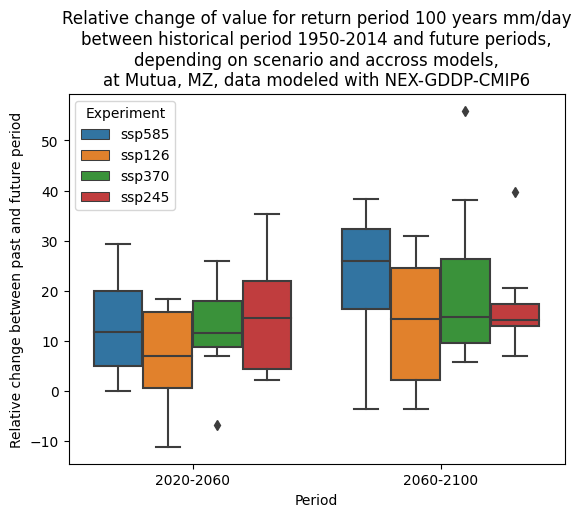

In [106]:
fig,ax=plt.subplots()
sns.boxplot(data=data_boxplot[['Name project','Experiment','Model','Relative change between past and future period','Period']],x='Period',y='Relative change between past and future period',hue='Experiment')

#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
#handles, labels=ax.get_legend_handles_labels()
#fig.legend(handles, labels, loc='upper right', ncol=1, bbox_to_anchor=(1.1, 0.6),title='Legend')
#ax.get_legend().remove() # this line permits to have a common legend for the boxplots and the line

plt.title('Relative change of value for return period 100 years mm/day\nbetween historical period 1950-2014 and future periods,\ndepending on scenario and accross models,\nat Mutua, MZ, data modeled with NEX-GDDP-CMIP6')

In [ ]:
df_years_gorongosa

In [16]:
def dataframe_threshold_coresponding_to_return_period(df):
    df_copy=df.copy(deep=True)
    df_copy=df_copy.drop(labels='Date',axis=1)
    df_max = df_copy.groupby(['Name project','Experiment','Model','Year']).agg(np.nanmax) # maximum    
    midx = pd.MultiIndex.from_product([list(set(df_copy[df_copy.columns[0]])),list(set(df_copy[df_copy.columns[1]])),list(set(df_copy[df_copy.columns[2]]))],names=['Name project','Experiment', 'Model'])
    cols = ['Value for return period 50 years mm/day','Value for return period 100 years mm/day']
    return_period = pd.DataFrame(data = [], 
                                index = midx,
                                columns = cols)
    for name_p in return_period.index.levels[0].tolist():
        for ssp in return_period.index.levels[1].tolist():
            for model in return_period.index.levels[2].tolist():
                print('Name project '+name_p+ ' ssp '+ssp+ ' model '+model)
                Z=df_max.loc[(name_p,ssp,model)]['Mean of the daily precipitation rate mm_per_day'].values.reshape(len(df_max.loc[(name_p,ssp,model)]['Mean of the daily precipitation rate mm_per_day']),)
                (loc1,scale)=stats.gumbel_r.fit(Z) # return the function necessary to establish the continous function
                # choice of gumbel because suits to extreme precipitation
                return_period.loc[(name_p,ssp,model),('Value for return period 50 years mm/day')] = threshold_coresponding_to_return_period(loc1,scale,50)
                return_period.loc[(name_p,ssp,model),('Value for return period 100 years mm/day')] = threshold_coresponding_to_return_period(loc1,scale,100)
                
    return return_period

In [ ]:
df_years

In [ ]:
#def dataframe_threshold_coresponding_to_return_period(df):
df_years=df_years[df_years['Model']!='IITM-ESM']
df_years=df_years[df_years['Model']!='MRI-ESM2-0']
df_years=df_years[df_years['Model']!='ACCESS-CM2'] 
df_years = df_years[df_years['Model']!='MPI-ESM1-2-HR']

In [ ]:
return_period_future=dataframe_threshold_coresponding_to_return_period(df_years[df_years['Experiment']!='historical'])

In [ ]:
return_period_past=dataframe_threshold_coresponding_to_return_period(df_years[df_years['Experiment']=='historical'])

In [ ]:
return_period_past=return_period_past.reset_index()
return_period_past_gorongosa=return_period_past[return_period_past['Name project']=='Gorongosa_EIB']

In [ ]:
return_period_past_gorongosa_clean = return_period_past_gorongosa.drop('Name project',axis=1)

In [ ]:
return_period_future=return_period_future.reset_index()
return_period_future=return_period_future[return_period_future['Name project']=='Gorongosa_EIB']
return_period_future_clean = return_period_future.drop('Name project',axis=1)

In [ ]:
fig,ax=plt.subplots()
sns.pointplot(data=return_period_future_clean[['Experiment','Model','Value for return period 100 years mm/day']],x='Model',y='Value for return period 100 years mm/day',hue='Experiment')

sns.pointplot(data=return_period_past_gorongosa_clean[['Experiment','Model','Value for return period 100 years mm/day']],x='Model',y='Value for return period 100 years mm/day',hue='Experiment',color='black')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
handles, labels=ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', ncol=1, bbox_to_anchor=(1.1, 0.6),title='Legend')
ax.get_legend().remove() # this line permits to have a common legend for the boxplots and the line

plt.title('Value for return period 100 years mm/day, depending on scenario and models,\n between 1950 to 2014 for historical scenario and between 2015 to 2100\nfor projections at Gorongosa, MZ, data modeled with NEX-GDDP-CMIP6')

In [ ]:
return_period_past_gorongosa_clean

In [ ]:
return_period_future_clean

In [ ]:
df_boxplot = pd.concat([return_period_past_gorongosa_clean,return_period_future_clean])

In [ ]:
df_boxplot

In [ ]:
fig,ax=plt.subplots()
sns.boxplot(data=df_boxplot[['Experiment','Model','Value for return period 100 years mm/day']],x='Experiment',y='Value for return period 100 years mm/day')#,hue='Experiment')

#ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
#handles, labels=ax.get_legend_handles_labels()
#fig.legend(handles, labels, loc='upper right', ncol=1, bbox_to_anchor=(1.1, 0.6),title='Legend')
#ax.get_legend().remove() # this line permits to have a common legend for the boxplots and the line

plt.title('Value for return period 100 years mm/day, depending on scenario and accross models,\n between 1950 to 2014 for historical scenario and between 2015 to 2100\nfor projections at Gorongosa, MZ, data modeled with NEX-GDDP-CMIP6')

In [ ]:
df_future = df_years[df_years['Experiment']!='historical']
df_future_2020_2060 = df_future[df_future['Year'].between(2020,2060)]
df_future_2060_2100 = df_future[df_future['Year'].between(2060,2100)]

In [ ]:
return_period_future_2020_2060=dataframe_threshold_coresponding_to_return_period(df_future_2020_2060)

In [ ]:
return_period_future_2060_2100=dataframe_threshold_coresponding_to_return_period(df_future_2060_2100)

In [ ]:
return_period_future_2020_2060['Period'] = '2020-2060'

In [ ]:
return_period_future_2060_2100['Period'] = '2060-2100'

In [ ]:
return_period_future_2020_2060

In [ ]:
return_period_future_2020_2060 = return_period_future_2020_2060.reset_index()
return_period_future_2020_2060_gorongosa = return_period_future_2020_2060[return_period_future_2020_2060['Name project']=='Gorongosa_EIB']

In [ ]:
return_period_future_2020_2060_gorongosa = return_period_future_2020_2060_gorongosa.drop('Name project',axis=1)

In [ ]:
return_period_future_2060_2100 = return_period_future_2060_2100.reset_index()
return_period_future_2060_2100_gorongosa = return_period_future_2060_2100[return_period_future_2060_2100['Name project']=='Gorongosa_EIB']
return_period_future_2060_2100_gorongosa = return_period_future_2060_2100_gorongosa.drop('Name project',axis=1)

In [ ]:
return_period_past_gorongosa_clean['Period'] = '1950-2014'

In [ ]:
df_boxplot = pd.concat([return_period_past_gorongosa_clean,return_period_future_2020_2060_gorongosa,return_period_future_2060_2100_gorongosa])

In [ ]:
df_boxplot

In [ ]:
fig,ax=plt.subplots()
sns.boxplot(data=df_boxplot[['Experiment','Model','Value for return period 100 years mm/day','Period']],x='Period',y='Value for return period 100 years mm/day',hue='Experiment')

handles, labels=ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', ncol=1, bbox_to_anchor=(1.15, 0.6),title='Legend')
ax.get_legend().remove() # this line permits to have a common legend for the boxplots and the line

plt.title('Value for return period 100 years mm/day, depending on period\n and scenario, presented accross models, at Gorongosa, MZ\ndata modeled with NEX-GDDP-CMIP6')

In [ ]:
df_years_gorongosa

In [ ]:
data1=df_years_gorongosa.groupby(['Experiment','Model','Year'])[['Mean of the daily precipitation rate mm_per_day']].agg(np.nanmax).reset_index()

In [ ]:
data1

In [ ]:
sns.lineplot(data=data1,x='Year',y='Mean of the daily precipitation rate mm_per_day',hue='Experiment')

In [ ]:
fig,ax=plt.subplots()
sns.pointplot(data=return_period_future_clean[['Experiment','Model','Value for return period 50 years mm/day']],x='Model',y='Value for return period 50 years mm/day',hue='Experiment')

sns.pointplot(data=return_period_past_gorongosa_clean[['Experiment','Model','Value for return period 50 years mm/day']],x='Model',y='Value for return period 50 years mm/day',hue='Experiment',color='black')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
handles, labels=ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', ncol=1, bbox_to_anchor=(1.1, 0.6),title='Legend')
ax.get_legend().remove() # this line permits to have a common legend for the boxplots and the line

plt.title('Value for return period 50 years mm/day, depending on scenario and models,\n between 1950 to 2014 for historical scenario and between 2015 to 2100\nfor projections at Gorongosa, MZ, data modeled with NEX-GDDP-CMIP6')

In [ ]:
return_period_future_clean

In [19]:
def threshold_coresponding_to_return_period(loc,scale,T):
    p_non_exceedance = 1 - (1/T)
    try:
        threshold_coresponding = round(gumbel_r.ppf(p_non_exceedance,loc,scale))
    except OverflowError: # the result is not finite
        if math.isinf(gumbel_r.ppf(p_non_exceedance,loc,scale)) and gumbel_r.ppf(p_non_exceedance,loc,scale)<0:
            # ppf is the inverse of cdf
            # the result is -inf
            threshold_coresponding = 0 # the value of wero is imposed
    return threshold_coresponding
    # ppf: Percent point function
    #print('Threshold '+str(threshold_coresponding)+' mm/day will be exceeded at least once in '+str(n)+' year, with a probability of '+str(round(p_exceedance*100))+ ' %')
    #print('This threshold corresponds to a return period of '+str(round(return_period))+ ' year event over a '+str(n)+' year period')

In [ ]:
def dataframe_threshold_coresponding_to_return_period_year(df):
    df_copy=df.copy(deep=True)
    #df_copy=df_copy.drop(labels='Date',axis=1)
    #df_max = df_copy.groupby(['Name project','Experiment','Model','Year']).max() # maximum    
    midx = pd.MultiIndex.from_product([list(set(df_copy[df_copy.columns[0]])),list(set(df_copy[df_copy.columns[1]])),list(set(df_copy[df_copy.columns[2]])),list(set(df_copy[df_copy.columns[5]]))],names=['Name project','Experiment', 'Model','Year'])
    cols = ['Value for return period 50 years mm/day','Value for return period 100 years mm/day']
    return_period = pd.DataFrame(data = [], 
                                index = midx,
                                columns = cols)
    for name_p in return_period.index.levels[0].tolist():
        for ssp in return_period.index.levels[1].tolist():
            for model in return_period.index.levels[2].tolist():
                for year in return_period.index.levels[3].tolist():
                    print('Name project '+name_p+ ' ssp '+ssp+ ' model '+model+' year '+str(year))
                    df_copy2=df_copy[df_copy['Name project']==name_p]
                    df_copy2 = df_copy2[df_copy2['Experiment']==ssp]
                    df_copy2=df_copy2[df_copy2['Model']==model]
                    df_copy2= df_copy2[df_copy2['Year']==year]
                    Z=df_copy2['Mean of the daily precipitation rate mm_per_day'].values.reshape(len(df_copy2['Mean of the daily precipitation rate mm_per_day']),)
                    (loc1,scale)=stats.gumbel_r.fit(Z) # return the function necessary to establish the continous function
                    # choice of gumbel because suits to extreme precipitation
                    return_period.loc[(name_p,ssp,model,year),('Value for return period 50 years mm/day')] = threshold_coresponding_to_return_period(loc1,scale,50)
                    return_period.loc[(name_p,ssp,model,year),('Value for return period 100 years mm/day')] = threshold_coresponding_to_return_period(loc1,scale,100)

    return return_period

In [ ]:
df_copy=df_years.copy(deep=True)
df_copy=df_copy.drop(labels='Date',axis=1)
df_max = df_copy.groupby(['Name project','Experiment','Model','Year'])#.max() # maximum   

In [ ]:
df_years[df_years['Experiment']=='historical' & df_years['Model']=='ACCESS-ESM1-5' ]

In [ ]:
df_year_past=dataframe_threshold_coresponding_to_return_period_year(df_years[df_years['Experiment']=='historical'])
df_year_past

In [ ]:
df_years2=df_years[df_years['Model']!='BCC-CSM2-MR']
df_years2=df_years2[df_years2['Model']!='CMCC-CM2-SR5']
df_years2=df_years2[df_years2['Model']!='CMCC-ESM2']
df_years2=df_years2[df_years2['Model']!='CanESM5']

In [ ]:
df_years2=df_years[df_years['Year'].between(2020,2080)]

In [ ]:
df_years2_past=df_years2[df_years2['Experiment']!='historical']
df_years2_past = df_years2_past[df_years2_past['Name project']=='Gorongosa_EIB']

In [ ]:
df_year_future=dataframe_threshold_coresponding_to_return_period_year(df_years2_past)
df_year_future

In [ ]:
fig,ax=plt.subplots()
sns.pointplot(data=return_period_future_clean[['Experiment','Model','Value for return period 50 years mm/day']],x='Model',y='Value for return period 50 years mm/day',hue='Experiment')

sns.pointplot(data=return_period_past_gorongosa_clean[['Experiment','Model','Value for return period 50 years mm/day']],x='Model',y='Value for return period 50 years mm/day',hue='Experiment',color='black')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
handles, labels=ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', ncol=1, bbox_to_anchor=(1.1, 0.6),title='Legend')
ax.get_legend().remove() # this line permits to have a common legend for the boxplots and the line

plt.title('Value for return period 50 years mm/day, depending on scenario and models,\n between 1950 to 2014 for historical scenario and between 2015 to 2100\nfor projections at Gorongosa, MZ, data modeled with NEX-GDDP-CMIP6')

In [ ]:
df_years[df_years['Experiment']=='historical']

In [ ]:
# past

In [ ]:
return_period_past=dataframe_threshold_coresponding_to_return_period(df_past)
return_period_past

In [ ]:
df_years[df_years['Experiment']=='historical'].groupby('Year').max().reset_index()

In [ ]:
return_period1=dataframe_threshold_coresponding_to_return_period(return_period_past=dataframe_threshold_coresponding_to_return_period(df_years[df_years['Experiment']=='historical']))
return_period1

In [ ]:
df_years

In [ ]:
# give each time different Z values


# ca va etre bizarre dans avec distribution, parce qu'avant juste valeur de 100, donc oui changement, meme valeur pour median, p10 et p90 pour valeur actuel
df_copy=df_years.copy(deep=True)
df_copy=df_copy.drop(labels='Date',axis=1)
df_copy=df_copy.drop(['Month','Season'],axis=1)
df_max_future = df_copy.groupby(['Name project','Experiment','Model','Year'])[['Mean of the daily precipitation rate mm_per_day']].max() # maximum

midx = pd.MultiIndex.from_product([list(set(df_copy[df_copy.columns[0]])),list(set(df_copy[df_copy.columns[1]])),list(set(df_copy[df_copy.columns[2]]))],names=['Name project','Experiment', 'Model'])
cols = ['Return period years of current 100 year return period']
return_period_future = pd.DataFrame(data = [], 
                            index = midx,
                            columns = cols)
for name_p in return_period_future.index.levels[0].tolist():
    for ssp in return_period_future.index.levels[1].tolist():
        for model in return_period_future.index.levels[2].tolist():
            Z=df_max_future.loc[(name_p,ssp,model)].values.reshape(len(df_max_future.index.levels[3]),)
            (loc1,scale1)=stats.gumbel_r.fit(Z) # return the function necessary to establish the continous function
            #return_period_coresponding = 1/(1-gumbel_r.cdf(return_period_past.loc[(name_p,ssp,model),('Value for return period 100 years mm/day')],loc1,scale))
            return_period_future.loc[(name_p,ssp,model),('Return period years of current 100 year return period')] = 1/(1-stats.gumbel_r.cdf(return_period_past.loc[(name_p,ssp,model),('Value for return period 100 years mm/day')],loc1,scale1)**(stop_year_future-start_year_future+1))
            
            #return_period_future.loc[(name_p,ssp,model),('Return period years of current 100 year return period')] = 1/(1-stats.gumbel_r.cdf(return_period_past.loc[(name_p,ssp,model),('Value for return period 100 years mm/day')],loc1,scale1))
            #p_non_exceedance = stats.gumbel_r.cdf(return_period_past.loc[(name_p,ssp,model),('Value for return period 100 years mm/day')],loc1,scale1)
            #return_period_future.loc[(name_p,ssp,model),('Return period years of current 100 year return period')] = stats.gumbel_r.ppf(p_non_exceedance,loc=loc1,scale=scale1)
            print('former value corresponding to 100 years return period '+str(return_period_past.loc[(name_p,ssp,model),('Value for return period 100 years mm/day')]))
            print('p non exceedance '+str(stats.gumbel_r.cdf(return_period_past.loc[(name_p,ssp,model),('Value for return period 100 years mm/day')],loc1,scale1)))
            print('n = '+str(stop_year_future-start_year_future+1))
            print('New return period '+str(return_period_future.loc[(name_p,ssp,model),('Return period years of current 100 year return period')]))

In [ ]:
df_max_future.index.levels[3]

In [ ]:
df_max_future.loc[(name_p,ssp,model)]

In [ ]:
return_period_future_distribution = return_period_future.astype(int).groupby(['Name project']).describe(percentiles=[.1, .5, .9])
return_period_future_distribution

In [ ]:
return_period_past_100 = return_period_future.copy(deep=True)
return_period_past_100['Return period years of current 100 year return period']=100
return_period_past_100=return_period_past_100.rename(columns={return_period_past_100.columns[0]:'Current return period of interest years'})
return_period_past_100

In [ ]:
return_period_past_100_distribution = return_period_past_100.astype(int).groupby(['Name project']).describe(percentiles=[.1, .5, .9])
return_period_past_100_distribution

In [ ]:
# Comparaison between past and future period
changes_past_future_indicator1 = changes_in_indicators(return_period_past_100_distribution,return_period_future_distribution,'Future return period of one day with a current return period of 100 years','[years]','Extreme rainfall change')
changes_past_future_indicator=pd.merge(changes_past_future_indicator, changes_past_future_indicator1, left_index=True, right_index=True, how='outer')
changes_past_future_indicator

## N-day event

### 1-day event

In [ ]:
from Functions_Indicators_precipitation import dataframe_1_day_event

In [ ]:
# past
df_1_day_event_past = dataframe_1_day_event(df_past)
df_1_day_event_past

In [ ]:
# past
df_1_day_event_future = dataframe_1_day_event(df_future)
df_1_day_event_future

In [ ]:
df_1_day_event_past_distribution = df_1_day_event_past.astype(int).groupby(['Name project']).describe(percentiles=[.1, .5, .9]) # astype(int) necessary to have stats min, max and percentiles
df_1_day_event_future_distribution = df_1_day_event_future.astype(int).groupby(['Name project']).describe(percentiles=[.1, .5, .9]) # astype(int) necessary to have stats min, max and percentiles

In [ ]:
# Comparaison between past and future period
changes_past_future_indicator1 = changes_in_indicators(df_1_day_event_past_distribution,df_1_day_event_future_distribution,'Maximum one day rainfall','mm','Extreme rainfall change')
changes_past_future_indicator=pd.merge(changes_past_future_indicator, changes_past_future_indicator1, left_index=True, right_index=True, how='outer')
changes_past_future_indicator

### 5-day event

In [ ]:
from Functions_Indicators_precipitation import dataframe_n_day_event
from Functions_Indicators_precipitation import df_to_csv

In [ ]:
# file of 5 day event
title_file = 'pr_5_day_event_'+str(start_year_past)+'-'+str(stop_year_future)+'.csv'
path_for_csv = os.path.join(out_path,'csv_file','pr_5_day_event')
path_to_csv_5_day_event = os.path.join(path_for_csv,title_file)
if not os.path.isfile(path_to_csv_5_day_event):
    print('The file has not been computed')
    df_5_day_event=dataframe_n_day_event(precipitation_2021_2060_copy,5)
    # first parameter is a dataframe, second is the number of days
    path_to_csv_5_day_event = df_to_csv(path_for_csv,title_file)
else:
    print('The file has already been computed')
    df_5_day_event = pd.read_csv(path_to_csv_5_day_event,header=[0],index_col=[0,1,2,3])
df_5_day_event

In [ ]:
df_5_day_event = df_5_day_event.reset_index()

Year = df_5_day_event[['Date']].values.reshape(len(df_5_day_event[['Date']].values),)
for i in np.arange(0,len(df_5_day_event[['Date']].values)):
    Year[i]=int(Year[i][6:10])

df_5_day_event['Year'] = Year
df_5_day_event

In [ ]:
df_5_day_event = df_5_day_event.groupby(['Name project', 'Experiment','Model','Year']).max().drop(labels='Date',axis=1)
df_5_day_event

In [ ]:
df_5_day_event_bis = df_5_day_event.reset_index()
df_5_day_event_past=df_5_day_event_bis.loc[df_5_day_event_bis['Year'].between(start_year_past,stop_year_past)]
df_5_day_event_future=df_5_day_event_bis.loc[df_5_day_event_bis['Year'].between(start_year_future,stop_year_future)]

In [ ]:
df_5_day_event_bis

In [ ]:
df_5_day_event_past

In [ ]:
df_5_day_event_future

In [ ]:
NaN_values= df_5_day_event_past.loc[df_5_day_event_past['Maximum 5 days rainfall mm'].isnull()]
model_to_delete=list(set(NaN_values['Model'].values))

In [ ]:
df_5_day_event_past.Model

In [ ]:
# delete Nan Model
df_5_day_event_past = df_5_day_event_past[df_5_day_event_past.Model.isin(model_to_delete) == False]
df_5_day_event_past

In [ ]:
df_5_day_event_past = df_5_day_event_past.groupby(['Name project', 'Experiment','Model','Year']).max()#.drop(labels=['level_0','index'],axis=1)
df_5_day_event_future = df_5_day_event_future.groupby(['Name project', 'Experiment','Model','Year']).max()#.drop(labels=['level_0','index'],axis=1)

In [ ]:
df_5_day_event_future

In [ ]:
df_5_day_event_past_distribution = df_5_day_event_past.astype(int).groupby(['Name project']).describe(percentiles=[.1, .5, .9]) # astype(int) necessary to have stats min, max and percentiles
df_5_day_event_future_distribution = df_5_day_event_future.astype(int).groupby(['Name project']).describe(percentiles=[.1, .5, .9]) # astype(int) necessary to have stats min, max and percentiles
df_5_day_event_future_distribution

In [ ]:
# Comparaison between past and future period
changes_past_future_indicator1 = changes_in_indicators(df_5_day_event_past_distribution,df_5_day_event_future_distribution,'Maximum 5 days rainfall','mm','Extreme rainfall change')
changes_past_future_indicator=pd.merge(changes_past_future_indicator, changes_past_future_indicator1, left_index=True, right_index=True, how='outer')
changes_past_future_indicator

In [ ]:
changes_past_future_indicator['Extreme rainfall change']

# Exposure level

In [ ]:
from Functions_Indicators_precipitation import level_exposure
# Are project vulnerable ? Exposure level
#from Functions_Indicators_precipitation import level_exposure
Exposure=level_exposure(changes_past_future_indicator)
Exposure